In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#　条件設定
u = np.array([1.0, 0.1])
sigma_u = np.array([[1, 0], [0, 1]])
vp = np.array([0.5, 0.5, 0.5])
sigma_p = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
theta = np.array([[1.0, 0.5, 0.2],[0.1, 0.3, 0.9]])

dt = 0.01

In [3]:
v = list(np.array([0, 0, 0]) for i in range(3000))
v[0] = vp
ep = list(np.array([0, 0, 0]) for i in range(3000))
eu = list(np.array([0, 0]) for i in range(3000))

In [4]:
# 知覚
for i in range(1, 3000):
    h = v[i-1]*v[i-1]
    g = theta.dot(h)
    dg = theta*2*v[i-1]

    v[i] = v[i-1] + dt * (dg.T.dot(eu[i-1]) - ep[i-1])
    ep[i] = ep[i-1] + dt * (v[i-1] - vp - sigma_p.dot(ep[i-1]))
    eu[i] = eu[i-1] + dt * (u - g - sigma_u.dot(eu[i-1]))

In [5]:
Hap = list(v[i][0] for i in range(3000))
Sad = list(v[i][1] for i in range(3000))
Ang = list(v[i][2] for i in range(3000))

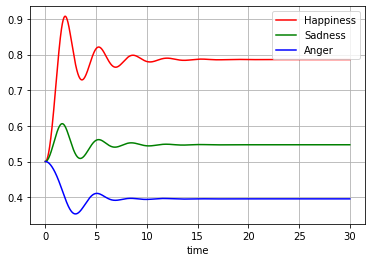

In [6]:
fig = plt.figure()
plt.plot(np.arange(0,30,0.01), Hap, color='r', label='Happiness')
plt.plot(np.arange(0,30,0.01), Sad, color='g', label='Sadness')
plt.plot(np.arange(0,30,0.01), Ang, color='b', label='Anger')
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()

In [7]:
ep[-1]

array([ 0.28611625,  0.04700511, -0.10483746])

In [8]:
eu[-1]

array([ 0.20118325, -0.19210034])